<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-subjects/blob/main/8_Thresholding%2C_Binarization_Adaptive_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thresholding, Binarization & Adaptive Thresholding**

## ⚡  **Thresholding**

Thresholding (Eşikleme), bir görüntünün ikili hale getirilmesidir. Genel olarak, gri tonlamalı bir görüntüyü, piksellerin 0 veya 255 olduğu ikili bir görüntüye dönüştürmeye çalışırız .

Basit bir eşikleme örneği, bir T eşik değeri seçmek ve ardından T'den küçük tüm piksel yoğunluklarını 0'a ve T'den büyük tüm piksel değerlerini 255'e ayarlamak olabilir . Bu şekilde, görüntünün ikili bir temsilini oluşturabiliyoruz.

Thresholding (Eşikleme), bilgisayarla görmede en yaygın (ve temel) bölütleme tekniklerinden biridir ve görüntünün ön planını (yani ilgilendiğimiz nesneleri) arka plandan ayırmamızı sağlar.

*Unutulmamalı ki burada eşik değerlerini manuel olarak biz belirliyoruz.*




**Thresholding Methods**

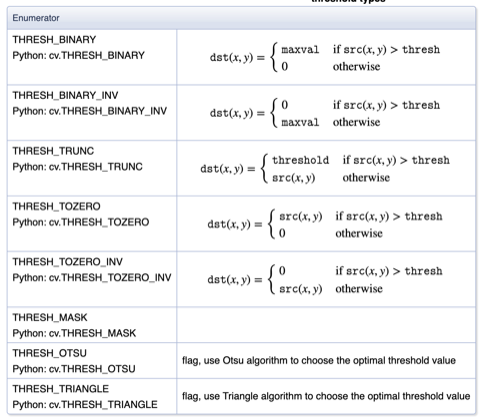

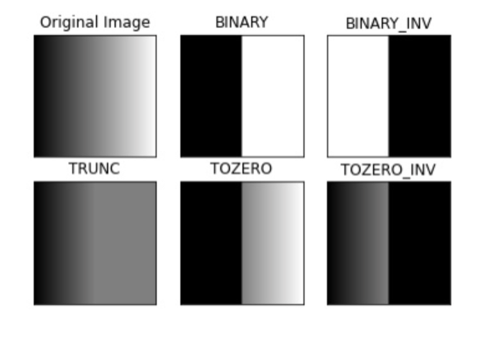

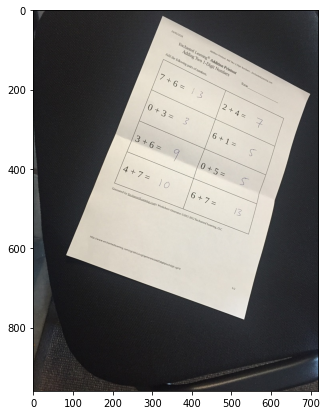

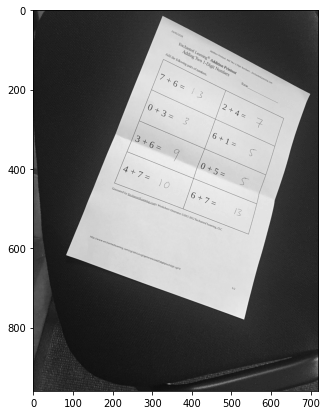

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/images/scan.jpg")

# Thresholding işlemi için görüntüyü gri skalaya çeviriyoruz
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.figure(figsize=(10,7))
plt.imshow(gray, cmap="gray")
plt.show()

In [6]:
ret,thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

Text(0.5, 1.0, 'THRESH TOZERO INV @ 127')

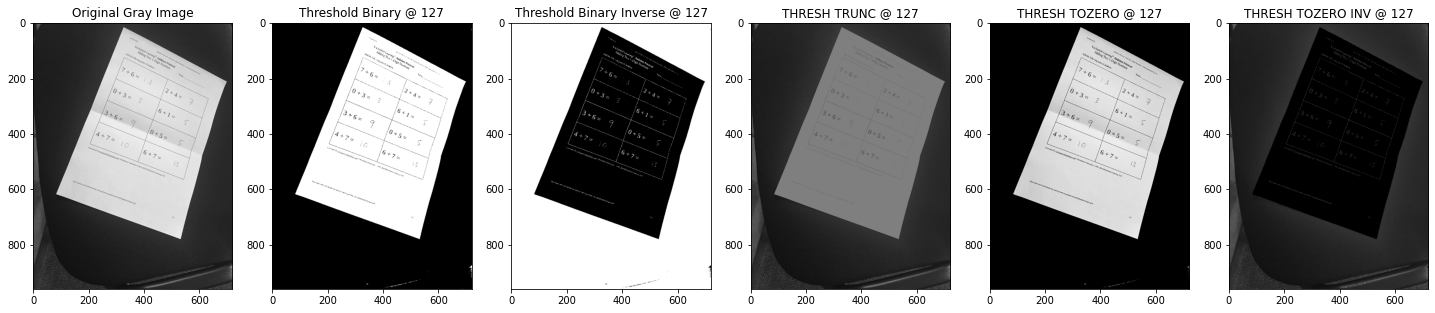

In [7]:
fig = plt.figure(figsize=(25, 25))

fig.add_subplot(1, 6, 1) 
plt.imshow(gray, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 6, 2)
plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
plt.title("Threshold Binary @ 127")

fig.add_subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
plt.title("Threshold Binary Inverse @ 127")

fig.add_subplot(1, 6, 4)
plt.imshow(cv2.cvtColor(thresh3, cv2.COLOR_BGR2RGB))
plt.title("THRESH TRUNC @ 127")

fig.add_subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(thresh4, cv2.COLOR_BGR2RGB))
plt.title("THRESH TOZERO @ 127")

fig.add_subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(thresh5, cv2.COLOR_BGR2RGB))
plt.title("THRESH TOZERO INV @ 127")

## ⚡ **Adaptive Thresholding**

### **1.ADAPTIVE_THRESH_MEAN_C**


```
cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
```

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


In [ ]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg",0)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Using adaptiveThreshold
thresh2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 



Text(0.5, 1.0, 'Adaptive Mean Thresholding')

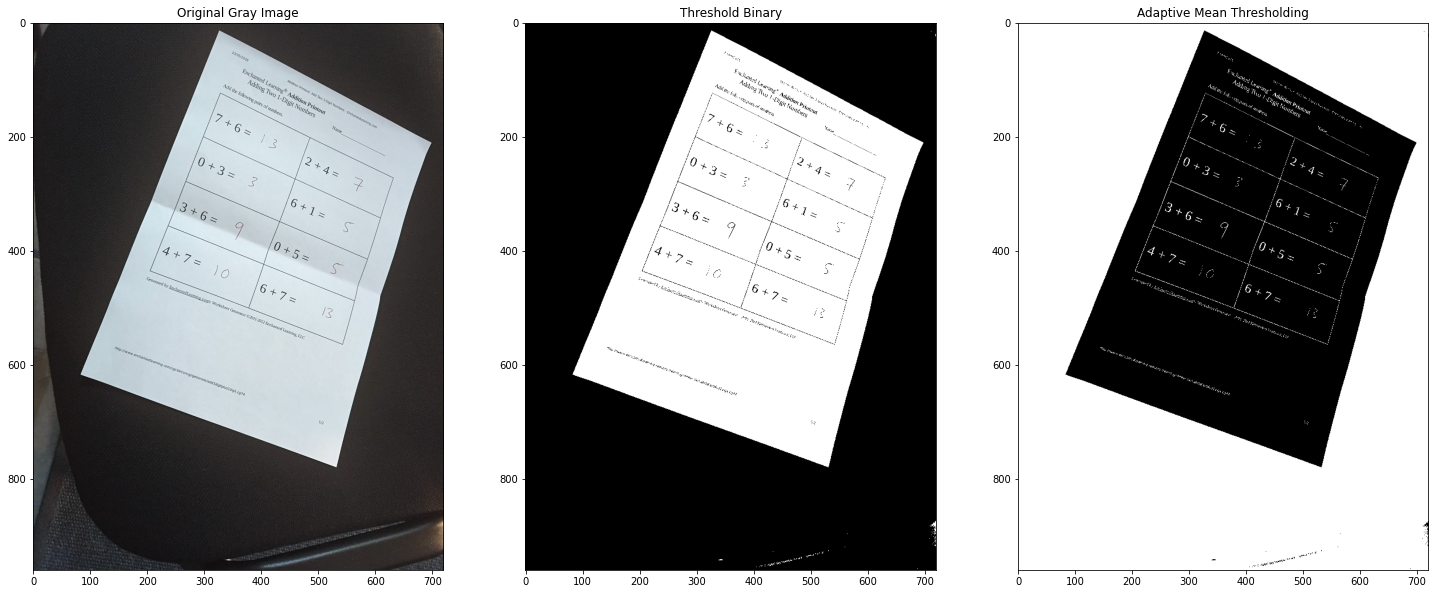

In [8]:
fig = plt.figure(figsize=(25, 25))

fig.add_subplot(1,3, 1) 
plt.imshow(image, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 3, 2)
plt.imshow(thresh1, cmap="gray")
plt.title("Threshold Binary")

fig.add_subplot(1, 3, 3)
plt.imshow(thresh2, cmap="gray")
plt.title("Adaptive Mean Thresholding")


### **2.Otsu Thresholding**
Basit eşikleme ile ilgili önceki bölümde, T eşik değerini manuel olarak sağlamamız gerekiyordu . 

Otsu'nun eşiklemesi girdi görüntüsüne dayalı olarak en uygun eşik değerini otomatik olarak hesaplar.


Biz sadece görüntü değer aralığını 0-255 olarak belirtiyoruz.

In [9]:
image = cv2.imread("/content/images/oxfordlibrary.jpeg",0)

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


Text(0.5, 1.0, "Guassian Otsu's Thresholding")

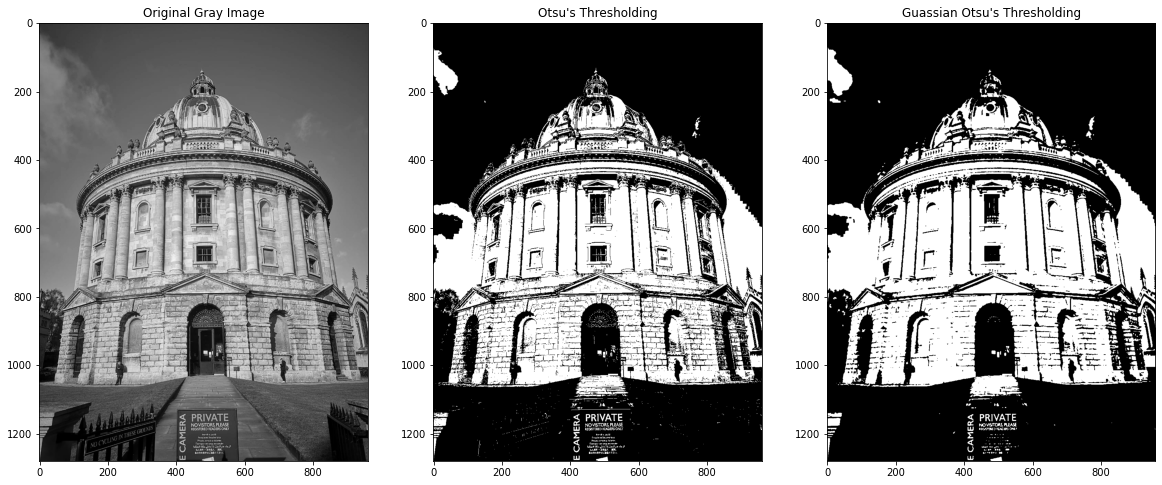

In [10]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1, 3, 2)
plt.imshow(th2, cmap="gray")
plt.title("Otsu's Thresholding")

fig.add_subplot(1, 3, 3)
plt.imshow(th3, cmap="gray")
plt.title("Guassian Otsu's Thresholding")


## **SkImage Threshold Local**

**HSV :**
* Hue - Renk tonu
* Saturation - Doyma
* Value (or Brightness) - Değer (veya Parlaklık)


**Hue - Renk tonu :** Hue (Ton), modelin 0 ila 360 derece arasında bir sayı olarak ifade edilen renk kısmıdır:

**Saturation - Doyma :** Belirli bir renkteki gri miktarını yüzde 0 ila 100 arasında tanımlar. Bu bileşenin sıfıra düşürülmesi daha fazla gri ortaya çıkarır ve soluk bir etki üretir. Bazen doygunluk, 0 ile 1 arasında bir aralık olarak görünür; burada 0 gridir ve 1 ana renktir.

**Value (or Brightness) - Değer (veya Parlaklık) :** Değer, doygunlukla birlikte çalışır ve rengin parlaklığını veya yoğunluğunu yüzde 0'dan yüzde 100'e kadar tanımlar; burada 0 tamamen siyahtır ve 100 en parlaktır ve en fazla rengi ortaya çıkarır.

In [ ]:
[0, 1, 2] ---> [H, S ,V]

True

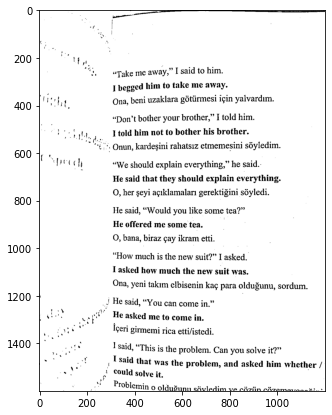

In [12]:
from skimage.filters import threshold_local

#image = cv2.imread('/content/images/oxfordlibrary.jpeg')
#image = cv2.imread("/content/book2.jpg") 
#image = cv2.imread("/content/paper.png") 
#image = cv2.imread("/content/WhatsApp Image 2023-02-04 at 17.31.30.jpeg")
image = cv2.imread("/content/images/page2.jpeg")

# burada sadece HSV renk skalasından sadece V(Parlaklık) kanalını alıyoruz
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]

# V matrisini threshold_local'e veriyoruz
T = threshold_local(V, 25, offset=15, method="gaussian")

thresh = (V > T).astype("uint8") * 255

plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))

cv2.imwrite("deneme.png",thresh )

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [16]:
image = cv2.imread("/content/images/page2.jpeg",0)

ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
_, thresh7 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


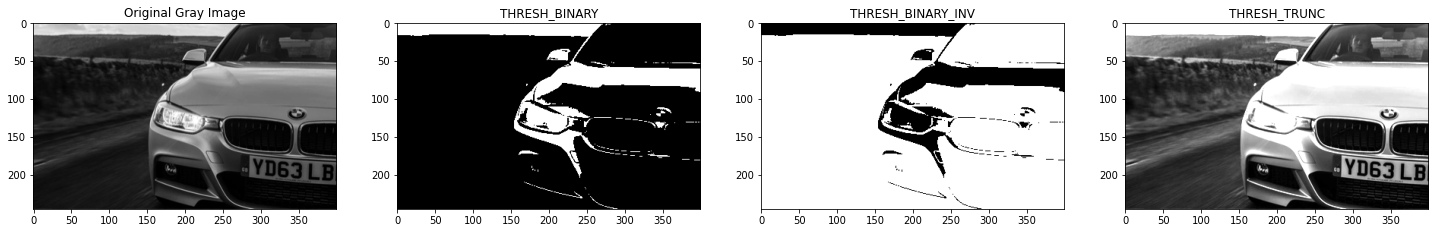

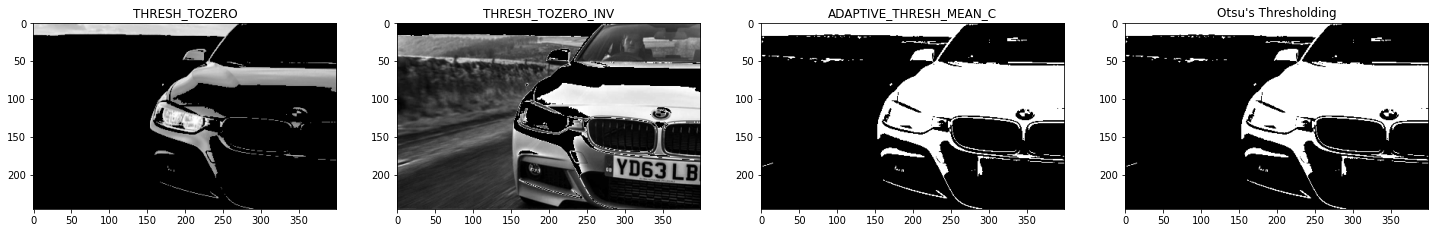

Text(0.5, 1.0, 'THRESH_TRUNC')

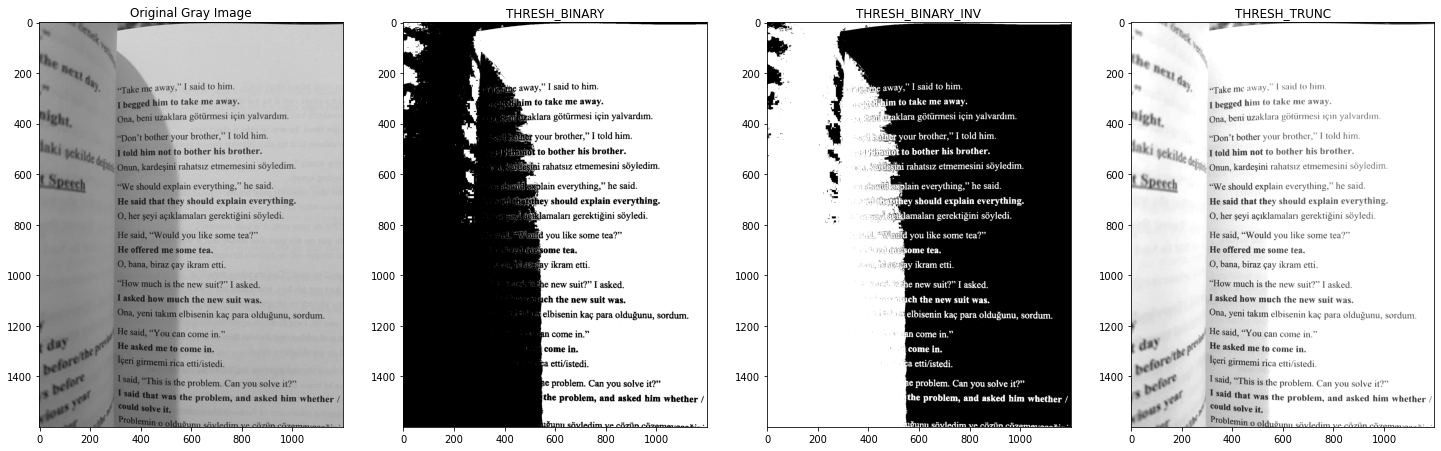

In [17]:
fig = plt.figure(figsize=(25, 25))

fig.add_subplot(1, 4, 1) 
plt.imshow(image, cmap ="gray")
plt.title("Original Gray Image")

fig.add_subplot(1,4, 2)
plt.imshow(thresh1, cmap="gray")
plt.title("THRESH_BINARY")

fig.add_subplot(1, 4, 3)
plt.imshow(thresh2, cmap="gray")
plt.title("THRESH_BINARY_INV")

fig.add_subplot(1, 4, 4) 
plt.imshow(thresh3, cmap ="gray")
plt.title("THRESH_TRUNC")


Text(0.5, 1.0, "Otsu's Thresholding")

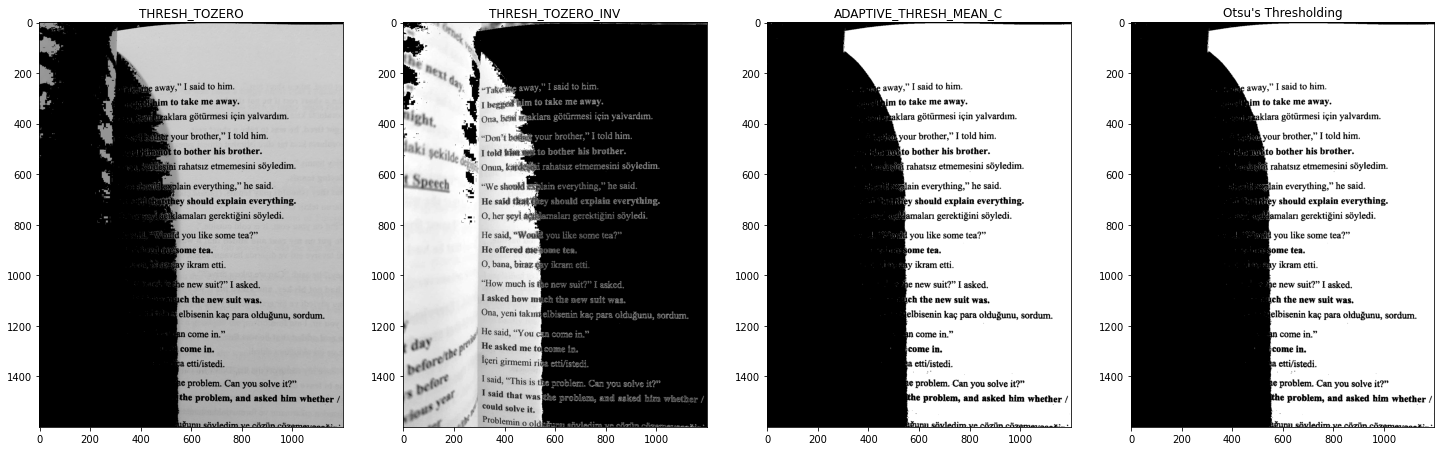

In [18]:
fig = plt.figure(figsize=(25, 25))

fig.add_subplot(1, 4, 1)
plt.imshow(thresh4, cmap="gray")
plt.title("THRESH_TOZERO")

fig.add_subplot(1, 4, 2)
plt.imshow(thresh5, cmap="gray")
plt.title("THRESH_TOZERO_INV")

fig.add_subplot(1, 4, 3)
plt.imshow(thresh7, cmap="gray")
plt.title("ADAPTIVE_THRESH_MEAN_C")

fig.add_subplot(1, 4, 4)
plt.imshow(thresh7, cmap="gray")
plt.title("Otsu's Thresholding")
